## Skew-T/log-p plot using data from University of Wyoming

In this tutorial, we will learn how to make a SkewT logP diagram for a particular sounding obtained from the University of Wyoming.

# 1. Import libraries

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import pandas_dataframe_to_unit_arrays, units
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir

/Users/sonnytruong/soft_install/anaconda3/envs/PhD/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


# 2. Download data

In [2]:
# http://weather.uwyo.edu/upperair/sounding.html
# 48900 VVTS Ho Chi Minh Observations at 00Z 13 May 2020
# 94866 YMML Melbourne Airport Observations at 00Z 13 May 2020
# 89611 Casey Observations at 00Z 13 May 2020
dt = datetime(2020, 5, 13, 0)
station = '48900'
# Read remote sounding data based on the provided time and station
data = WyomingUpperAir.request_data(dt, station)

# create a dictionary with metpy
df = pandas_dataframe_to_unit_arrays(data)
print(df.keys())

dict_keys(['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed', 'u_wind', 'v_wind', 'station', 'station_number', 'time', 'latitude', 'longitude', 'elevation'])


# 3. Take out the variables

In [3]:
# take out the variable
p  = df['pressure']
T  = df['temperature']
Td = df['dewpoint']
u  = df['u_wind']
v  = df['v_wind']

# 4. Plotting

Make Skew-T Plot
The code below makes a basic skew-T plot using the MetPy plot module that contains a SkewT class.

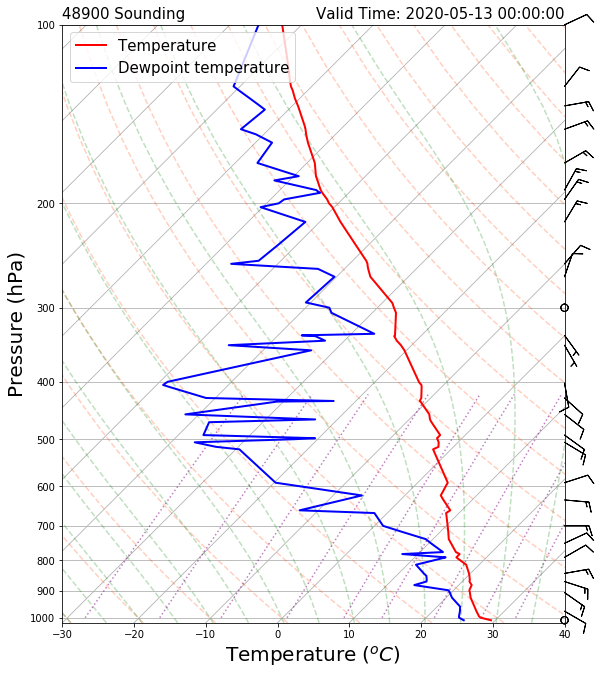

In [4]:
fig = plt.figure(figsize=(9, 11))

skew = SkewT(fig, rotation=45)

skew.plot(p, T, 'r', lw=2, label='Temperature')
skew.plot(p, Td,'b', lw=2, label='Dewpoint temperature')
skew.plot_barbs(p[::3], u[::3], v[::3], y_clip_radius=0.03)

skew.ax.set_xlim(-30, 40)
skew.ax.set_ylim(1020, 100)

skew.plot_dry_adiabats(t0=np.arange(233, 533, 10)  * units.K,   alpha=0.25, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K,   alpha=0.25, color='green')
skew.plot_mixing_lines(p=np.arange(1000, 400, -20) * units.hPa, alpha=0.5,  color='purple', linestyle='dotted')

plt.title('{} Sounding'.format(station), fontsize=15, loc='left')
plt.title('Valid Time: {}'.format(dt), fontsize=15, loc='right')
plt.xlabel("Temperature ($^oC$)", fontsize=20)
plt.ylabel("Pressure (hPa)", fontsize=20)
plt.legend(loc='upper left', fontsize=15)
plt.show()

## All done !!!
- Please feel free to let me know if there is any analysis that you would like me to do
- Please subscribe my youtube channel too
- Thank you very much